# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1:Koral 4663
# student 2:Fanny 8236

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
#libraries we using 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_classif



In [3]:
#Load the Data sets 
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

print("5 First instances of Training Data:")
df_train.head()

5 First instances of Training Data:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [4]:
print("\n5 First instances of Testing Data:")
df_test.head()


5 First instances of Testing Data:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [5]:

# Checking missing valuse 
print("Missing values in training data:\n")
print(df_train.isnull().sum())

#Checking duplicates
print('\nDuplicates:')
df_train.duplicated().sum()



Missing values in training data:

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

Duplicates:


80

In [6]:
#Dropping duplicates
df_train.drop_duplicates()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
705,2,1,28.0,0,0,10.5000,0,0
707,1,1,54.0,0,0,51.8625,0,0
708,3,1,14.0,5,2,46.9000,0,0
709,2,0,6.0,0,1,33.0000,0,1


In [7]:
#EDA
print("Data types:")
df_train.dtypes

Data types:


Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Survived      int64
dtype: object

In [8]:
print("Statistic Information:")
df_train.describe()

Statistic Information:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


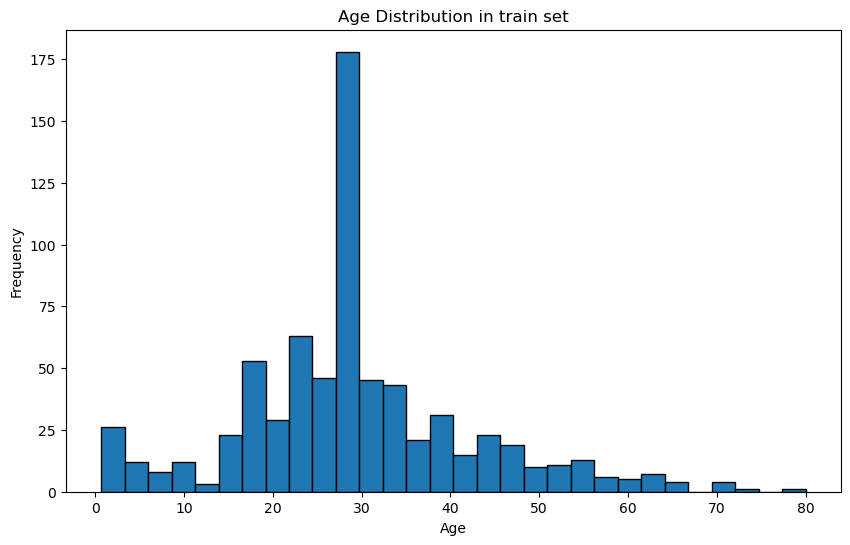

In [9]:
# Visualization Distribution of 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df_train['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution in train set')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

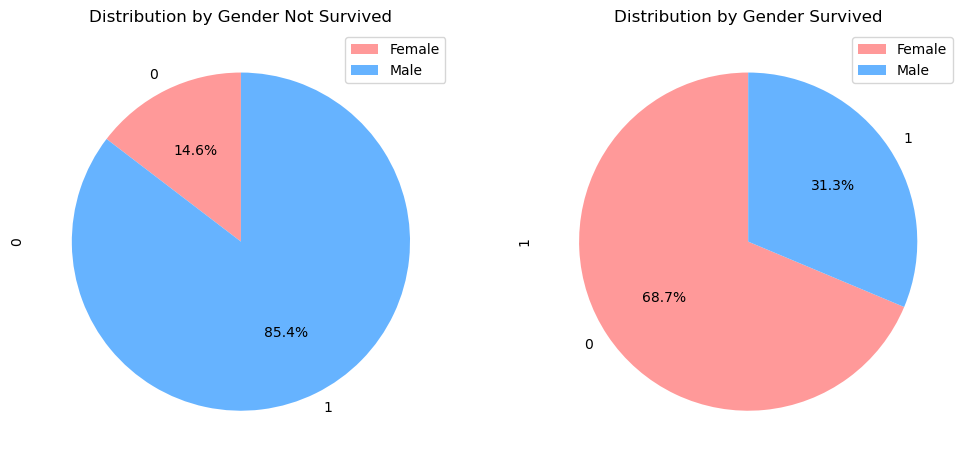

In [10]:
#Visualization Count of survivors by Sex

summary = df_train.groupby(['Sex', 'Survived']).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

summary[0].plot(kind='pie', ax=axes[0], autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"], legend=True, startangle=90)
axes[0].set_title('Distribution by Gender Not Survived')
axes[0].legend(['Female', 'Male'])

summary[1].plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"], legend=True, startangle=90)
axes[1].set_title('Distribution by Gender Survived')
axes[1].legend(['Female', 'Male'])

plt.show()

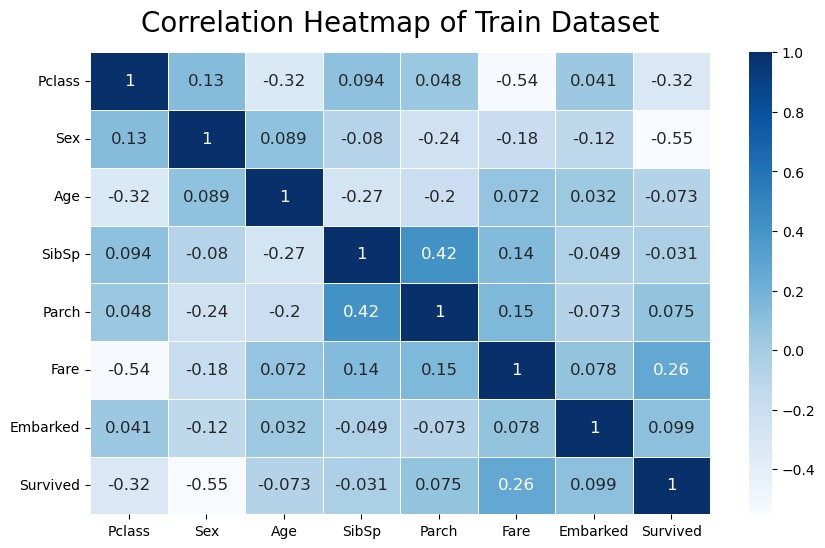

In [11]:
#Visualization using Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(), annot=True, cmap='Blues', linewidth=0.5, annot_kws={"size": 12})  # Adjust font size here
plt.title('Correlation Heatmap of Train Dataset',fontsize=20,pad=15)
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [114]:
# Prepping tarining data
X_train = df_train.drop('Survived', axis=1)
Y_train = df_train['Survived']

# Define pipelines
pipeline_dt = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), #Feature Engineering
    ('scaler', StandardScaler()), #Feature Engineering
    ('var_thresh', VarianceThreshold(threshold=0.01)),  # Feature selection
    ('feature_selection', SelectKBest(f_classif, k=5)), # Feature Selection
    ('model', DecisionTreeClassifier()),
])

pipeline_knn = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), #Feature Engineering
    ('scaler', StandardScaler()), #Feature Engineering
    ('var_thresh', VarianceThreshold(threshold=0.01)),  # Feature selection
    ('model', KNeighborsClassifier())

])
pipeline_nb = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), #Feature Engineering
    ('scaler', MinMaxScaler()), #Feature Engineering
    ('var_thresh', VarianceThreshold(threshold=0.01)),  # Feature selection
    ('model', GaussianNB())

])

# Define parameter grids
param_grid_dt = {
    'model__max_depth': [3, 5, 7, 10, 15],
    'model__min_samples_split': [2, 5, 10, 15],
    'model__criterion': ['gini', 'entropy'],
    'model__max_features': [None, 'sqrt', 'log2'],
    'feature_selection__k': [3, 5, 7]  # Number of features to select
}

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 10],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__leaf_size': [20, 30, 40]
}

param_grid_nb = {
    'model__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Set up GridSearchCV - Using F1 
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='f1',error_score='raise')
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='f1')
grid_search_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=5, scoring='f1')

# Fit GridSearchCV
grid_search_dt.fit(X_train, Y_train)
grid_search_knn.fit(X_train, Y_train)
grid_search_nb.fit(X_train, Y_train)

print("Decision Tree Best parameters found: ", grid_search_dt.best_params_)
print("Decision Tree Best cross-validation score (F1): ", grid_search_dt.best_score_)

print("KNN Best parameters found: ", grid_search_knn.best_params_)
print("KNN Best cross-validation score (F1): ", grid_search_knn.best_score_)

print("Naive Bayes parameters found: ", grid_search_nb.best_params_)
print("Naive Bayes Best cross-validation score (F1): ", grid_search_nb.best_score_)

Decision Tree Best parameters found:  {'feature_selection__k': 3, 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_split': 2}
Decision Tree Best cross-validation score (F1):  0.7545295346288395
KNN Best parameters found:  {'model__algorithm': 'ball_tree', 'model__leaf_size': 40, 'model__n_neighbors': 3, 'model__p': 2, 'model__weights': 'uniform'}
KNN Best cross-validation score (F1):  0.7442468721103442
Naive Bayes parameters found:  {'model__var_smoothing': 1e-09}
Naive Bayes Best cross-validation score (F1):  0.7216368866267281


### Cross-Validation Results

In [115]:
# Create DataFrame for Decision Tree
results_td = pd.DataFrame(grid_search_dt.cv_results_)[['params', 'mean_test_score']]
results_td['Model'] = 'Decision Tree'
# Create DataFrame for KNN
results_knn = pd.DataFrame(grid_search_knn.cv_results_)[['params', 'mean_test_score']]
results_knn['Model'] = 'KNN'
# Create DataFrame for Naive Bayes
results_nb = pd.DataFrame(grid_search_knn.cv_results_)[['params', 'mean_test_score']]
results_nb['Model'] = 'Naive Bayes'


# sum up all  results into a summary DataFrame
sum_results = pd.concat([results_td, results_knn,results_nb], ignore_index=True)

# Display sum_results
pd.set_option('display.max_colwidth', None)
sum_results


,params,mean_test_score,Model
0,"{'feature_selection__k': 3, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__max_features': None, 'model__min_samples_split': 2}",0.729841,Decision Tree
1,"{'feature_selection__k': 3, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__max_features': None, 'model__min_samples_split': 5}",0.729841,Decision Tree
2,"{'feature_selection__k': 3, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__max_features': None, 'model__min_samples_split': 10}",0.729841,Decision Tree
3,"{'feature_selection__k': 3, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__max_features': None, 'model__min_samples_split': 15}",0.729841,Decision Tree
4,"{'feature_selection__k': 3, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__max_features': 'sqrt', 'model__min_samples_split': 2}",0.611619,Decision Tree
...,...,...,...
739,"{'model__algorithm': 'brute', 'model__leaf_size': 40, 'model__n_neighbors': 7, 'model__p': 2, 'model__weights': 'distance'}",0.722184,Naive Bayes
740,"{'model__algorithm': 'brute', 'model__leaf_size': 40, 'model__n_neighbors': 10, 'model__p': 1, 'model__weights': 'uniform'}",0.708998,Naive Bayes
741,"{'model__algorithm': 'brute', 'model__leaf_size': 40, 'model__n_neighbors': 10, 'model__p': 1, 'model__weights': 'distance'}",0.730857,Naive Bayes
742,"{'model__algorithm': 'brute', 'model__leaf_size': 40, 'model__n_neighbors': 10, 'model__p': 2, 'model__weights': 'uniform'}",0.723183,Naive Bayes


### Comparing best final results

In [116]:
results = {
    "Model": [
        "Decision Tree", "KNN", 
        "Naive Bayes"
    ],
    "Best Parameters": [
        grid_search_dt.best_params_, grid_search_knn.best_params_, 
        grid_search_nb.best_params_
    ],
    "Best CV F1 Score": [
        "{:.4f}".format(grid_search_dt.best_score_),
        "{:.4f}".format(grid_search_knn.best_score_),
        "{:.4f}".format(grid_search_nb.best_score_),
    ]
}
# Create a DataFrame
summary_df = pd.DataFrame(results)
summary_df


,Model,Best Parameters,Best CV F1 Score
0,Decision Tree,"{'feature_selection__k': 3, 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_split': 2}",0.7545
1,KNN,"{'model__algorithm': 'ball_tree', 'model__leaf_size': 40, 'model__n_neighbors': 3, 'model__p': 2, 'model__weights': 'uniform'}",0.7442
2,Naive Bayes,{'model__var_smoothing': 1e-09},0.7216


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

### Best model: Decision Tree

Hyperparameters:
* feature_selection__k: 3
* criterion:entropy
* max_depth: 10
* max_features:log2
* min_samples_split: 2

In [118]:
# Retraining the best model
best_model = grid_search_dt.best_estimator_ 

best_model.fit(X_train,Y_train)

# Predictions on train data
train_predictions = best_model.predict(X_train)

# Calculate F1-Score on train data
f1_train = f1_score(Y_train, train_predictions,average='binary')
print(f'F1 Score on train data (Best Model): {f1_train}')

F1 Score on train data (Best Model): 0.8388349514563107


## Part 5 - Apply on test and show model performance estimation

In [119]:
# Remove the 'Survived' column from X_test to keep only the features
X_test = df_test.drop('Survived', axis=1)

# Assign the 'Survived' column from df_test to Y_test (true labels for test data)
Y_test = df_test['Survived']

# Make predictions on the test data using the best model
test_predictions = best_model.predict(X_test)

# Add the predictions as a new column 'Predicted_Survived' in the test DataFrame
df_pred=df_test.copy()
df_pred['Predicted_Survived'] = test_predictions

df_pred.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Predicted_Survived
0,3,1,35.000000,0,0,7.0500,0,0,0
1,3,1,30.000000,0,0,7.2500,0,0,0
2,3,1,29.699118,0,0,14.5000,0,0,0
3,3,0,21.000000,0,0,7.7500,2,0,1
4,3,1,32.000000,0,0,56.4958,0,1,1


### Confusion Matrix

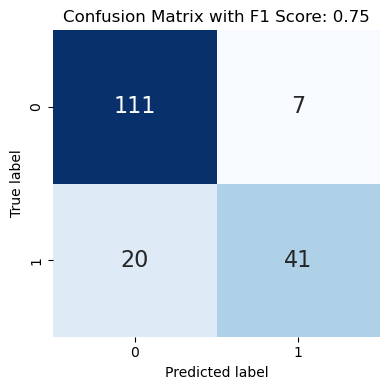

In [120]:
# Plotting the confusion matrix with a heatmap for better visualization
plt.figure(figsize=(4, 4))
confusion_mat = confusion_matrix(Y_test, test_predictions)
f1_test = f1_score(Y_test, test_predictions,average='binary')

# Plot the heatmap and set fmt='d' to display integer values
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

# Add titles and labels
plt.title(f"Confusion Matrix with F1 Score: {f1_test:.2f}")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Adjust the layout to avoid cutting off labels
plt.tight_layout()

# Display the plot
plt.show()


In [121]:
# Calculate F1-Score on test data
print(f'F1 Score on test data (Best Model): {f1_test}')

# Calculate accuracy on test data
accuracy_test = accuracy_score(Y_test, test_predictions)
print(f'Accuracy Score on test data (Best Model): {accuracy_test}')

F1 Score on test data (Best Model): 0.7522935779816514
Accuracy Score on test data (Best Model): 0.8491620111731844
